In [161]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

#For Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split #Splits the data into training and testing sets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

#Libraires for Classification Models
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import classification_report,plot_confusion_matrix #Metrics for analyzing the model performance

In [162]:
train=pd.read_csv('/content/train.csv')

In [163]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [164]:
#Displaying Information about Training Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [165]:
#Dropping ID and Name because ID and Name will not have bigger impact on the prediction
train=train.drop(['PassengerId','Name'],axis=1)

In [166]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [167]:
#checking for Null Values
#Checking columns with missing data
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [168]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [169]:
#Transformation of categorical column
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0],inplace =True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0],inplace =True)
train['Cabin'].fillna(train['Cabin'].mode()[0],inplace =True)
train['Destination'].fillna(train['Destination'].mode()[0],inplace =True)
train['VIP'].fillna(train['VIP'].mode()[0],inplace =True)

In [170]:
#Transformation of numerical column
train['Age'].fillna(train.Age.mean(),inplace = True)
train['RoomService'].fillna(train.RoomService.mean(),inplace = True)
train['FoodCourt'].fillna(train.FoodCourt.mean(),inplace = True)
train['ShoppingMall'].fillna(train.ShoppingMall.mean(),inplace = True)
train['Spa'].fillna(train.Spa.mean(),inplace = True)
train['VRDeck'].fillna(train.VRDeck.mean(),inplace = True)

In [171]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

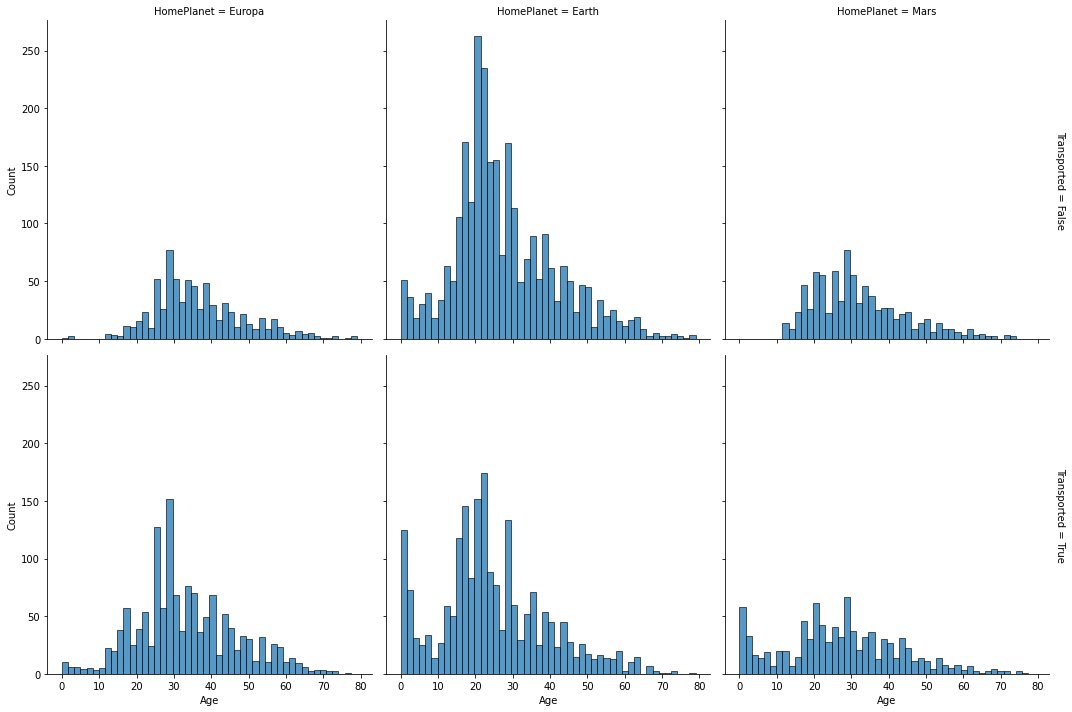

In [172]:
sns.displot(
    train, x="Age", col="HomePlanet", row="Transported",
     facet_kws=dict(margin_titles=True),)

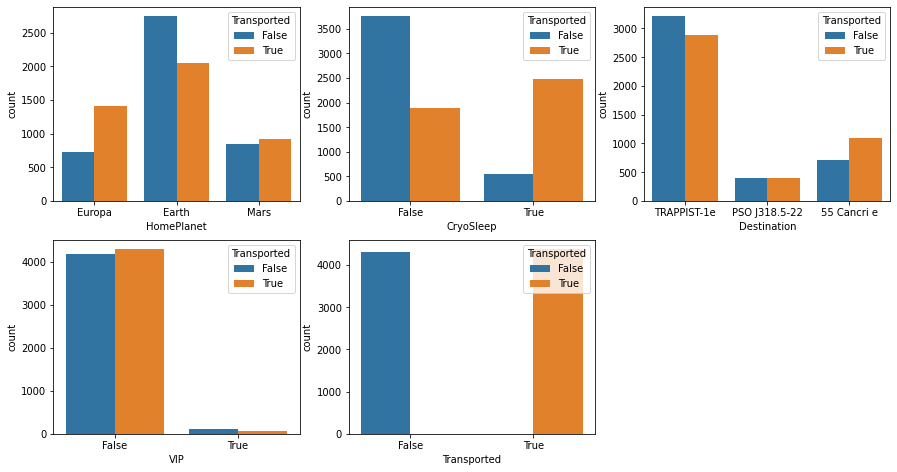

In [173]:
i = 1
plt.figure(figsize = (15,25))
feature=['HomePlanet','CryoSleep','Destination','VIP','Transported']
for feature in feature:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Transported', data =train)
    i +=1

In [174]:
objcol = train.select_dtypes(include = "object").columns
print (objcol)

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objcol:
    train[feat] = le.fit_transform(train[feat].astype(str))

train.head()

Index(['HomePlanet', 'Cabin', 'Destination'], dtype='object')


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,False,149,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0,False,2184,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,False,1,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,False,1,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0,False,2186,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [175]:
train['Transported'].replace([False, True],[0,1],inplace=True) 

In [176]:
X = train.drop(columns='Transported',axis=1)
Y = train['Transported']

In [177]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,False,149,2,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0,False,2184,2,24.0,False,109.0,9.0,25.0,549.0,44.0
2,1,False,1,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,1,False,1,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0,False,2186,2,16.0,False,303.0,70.0,151.0,565.0,2.0


In [178]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [179]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Logistic Regression

In [180]:
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [181]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [182]:
y_pred = model.predict(X_test)

In [183]:
y_pred_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': model.predict(X_test)})

In [184]:
y_pred_df

,actual,predicted_prob
5897,0,0
5576,0,0
1657,0,0
7861,0,1
7630,0,0
...,...,...
1153,0,0
3316,1,0
1019,0,0
5600,1,0


In [185]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[600 228]
 [152 759]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       828
           1       0.77      0.83      0.80       911

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



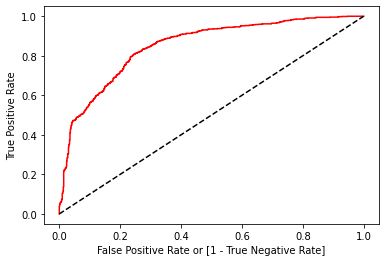

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba (X_test)[:,1])

auc = roc_auc_score(Y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [187]:
auc

0.7788940326763073

XGBOOST 

In [188]:
#fit model to training data
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, Y_train)

XGBClassifier(n_estimators=90)

In [189]:
#Make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [190]:
#Evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy*100.0))

Accuracy: 79.64%


LightGBM

In [191]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, Y_train)

In [193]:
d_train

In [194]:
params = {}                  #Python dictionary
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt' #dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [195]:
clf = lgb.train(params, d_train, 1400)
# import warning

In [196]:
Y_pred = clf.predict(X_test)

In [197]:
predictions1 = [round(value) for value in Y_pred]

In [198]:
accuracy = accuracy_score(Y_test, predictions1)
print('Accuracy: %.2f%%' % (accuracy*100.0))

Accuracy: 79.70%
